In [1]:
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

%matplotlib inline

## Importing dataset

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

col_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

dataset = pd.read_csv( url , names = col_names)

In [3]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Preprocessing

In [4]:
X = dataset.iloc[:, :-1].values

y = dataset.iloc[:, 4].values

## Train / test split

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Feature scaling

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit( X_train )

X_train = scaler.transform( X_train )

X_test = scaler.transform( X_test)

## Training & predictions

In [10]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier( n_neighbors = 5 )

clf_knn.fit( X_train , y_train )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [11]:
y_pred = clf_knn.predict( X_test )

In [12]:
y_pred

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

## Evaluating the algorithm

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

print( confusion_matrix( y_test , y_pred ) )

print( classification_report( y_test , y_pred ) )

[[ 7  0  0]
 [ 0  7  1]
 [ 0  1 14]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.88      0.88      0.88         8
 Iris-virginica       0.93      0.93      0.93        15

      micro avg       0.93      0.93      0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.93      0.93      0.93        30



## Comparing Error Rate with the K Value

In [14]:
error = []


for i in range(1, 40) :
    
    knn = KNeighborsClassifier( n_neighbors = i )
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

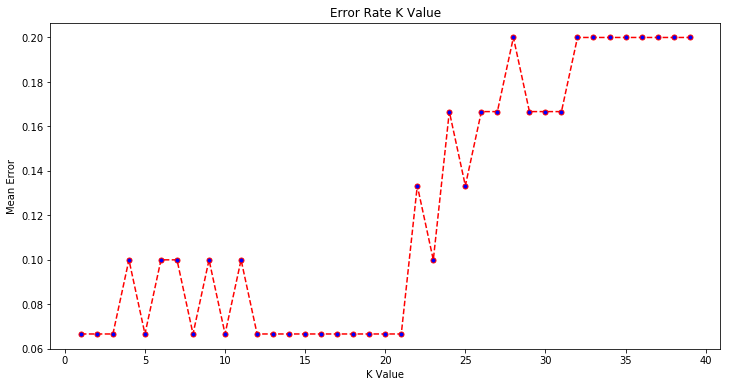

In [19]:
plt.figure(figsize=(12, 6))

plt.plot( range(1, 40) , 
          error , 
          color = 'red', 
          linestyle = 'dashed' , 
          marker = 'o',
          markerfacecolor = 'blue' , 
          markersize = 5 )

plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')